In [1]:
## IMPORT LIBRARIES
import pickle
import numpy as np
import cv2
import glob
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from moviepy.editor import VideoFileClip
from IPython.display import HTML

Camera Calibration Complete


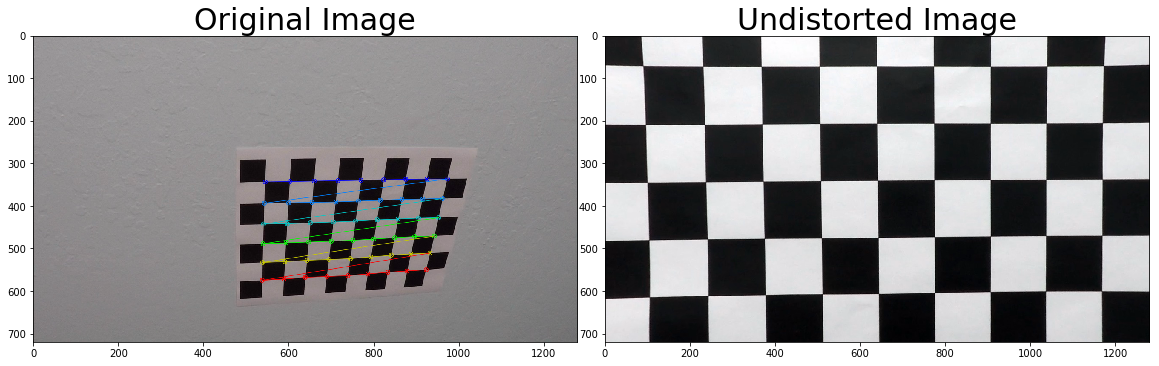

In [2]:
###################################################################################################################
############################################ Camera Calibration Test ##############################################
###################################################################################################################

# Prepare object points
nx = 9
ny = 6
objp = np.zeros((nx*ny, 3), np.float32)
objp[:,:2] = np.mgrid[0:9,0:6].T.reshape(-1, 2)

objpoints = []
imgpoints = []

# Make a list of calibration images
images = glob.glob('./camera_cal/calibration*.jpg')

# termination criteria
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 30, 0.001)

# For the list of images search and display chessboard corners if found
for i, fname in enumerate(images):
    
    # Read in the image
    img = cv2.imread(fname)

    # Convert to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Find the chessboard corners
    ret, corners = cv2.findChessboardCorners(gray, (nx, ny), None)

    # If found, append object points and draw corners
    if ret == True:
        
        # Append object points
        objpoints.append(objp)
        
        # Append image points
        corners2 = cv2.cornerSubPix(gray,corners,(11,11),(-1,-1),criteria)
        imgpoints.append(corners2)
    
        # Draw chessboard corners
        img = cv2.drawChessboardCorners(img, (nx, ny), corners, ret)
    
## Camera Calibration Example

# Read in an image
example_img = cv2.imread('./camera_cal/calibration10.jpg')
example_size = (example_img.shape[1], example_img.shape[0])

# Convert to grayscale
gray_example = cv2.cvtColor(example_img, cv2.COLOR_BGR2GRAY)

# Find the chessboard corners
ret, corners = cv2.findChessboardCorners(gray_example, (nx, ny), None)

# If found, append object points and draw corners
if ret == True:
        
    # Append object points
    objpoints.append(objp)
    
    # Append image points
    corners2 = cv2.cornerSubPix(gray_example, corners, (11,11), (-1,-1), criteria)
    imgpoints.append(corners2)
    
    # Draw chessboard corners
    example_img_chessboard = cv2.drawChessboardCorners(example_img, (nx, ny), corners, ret)

# Camera calibration
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, example_size, None, None)

# Assign imported pickle details
dist_pickle = {}
dist_pickle["mtx"] = mtx
dist_pickle["dist"] = dist
pickle.dump( dist_pickle, open( "calibration.p", "wb" ) )

# Camera Undistortion
undist_example = cv2.undistort(img, mtx, dist, None, mtx)

# Visualize undistortion
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
f.subplots_adjust(hspace = .2, wspace=.05)
ax1.imshow(example_img_chessboard)
ax1.set_title('Original Image', fontsize=30)
ax2.imshow(undist_example)
ax2.set_title('Undistorted Image', fontsize=30)

print('Camera Calibration Complete')

In [3]:
#######################################################################################################################
############################################### EXAMPLE IMAGE DATA ####################################################
#######################################################################################################################

# Read in example image 1
example_img1 = cv2.imread('./test_images/test6.jpg')
example_img1 = cv2.cvtColor(example_img1, cv2.COLOR_BGR2RGB)

# Read in example image 2
example_img2 = cv2.imread('./test_images/test4.jpg')
example_img2 = cv2.cvtColor(example_img2, cv2.COLOR_BGR2RGB)

# Create copy of image for birds-eye view image later on
topdown_img = np.copy(example_img1)

# Define shape of image [h = height, w = width]
h_example, w_example = example_img1.shape[:2]

# Define source and destination points using width of image, height of image, and offset
offset = 200
src = np.float32([(593,450),(700,450),(1200,700),(200,700)])
dst = np.float32([(offset,0),(w_example-offset,0),(w_example-offset,h_example),(offset,h_example)])

print('Example Images Imported')

Example Images Imported


Perspective Transform Test Complete


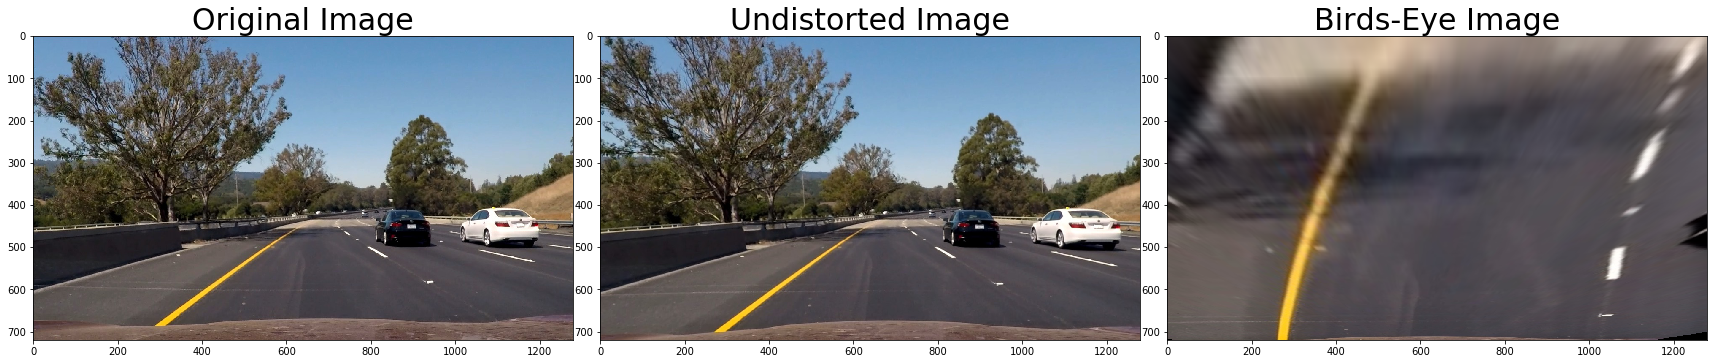

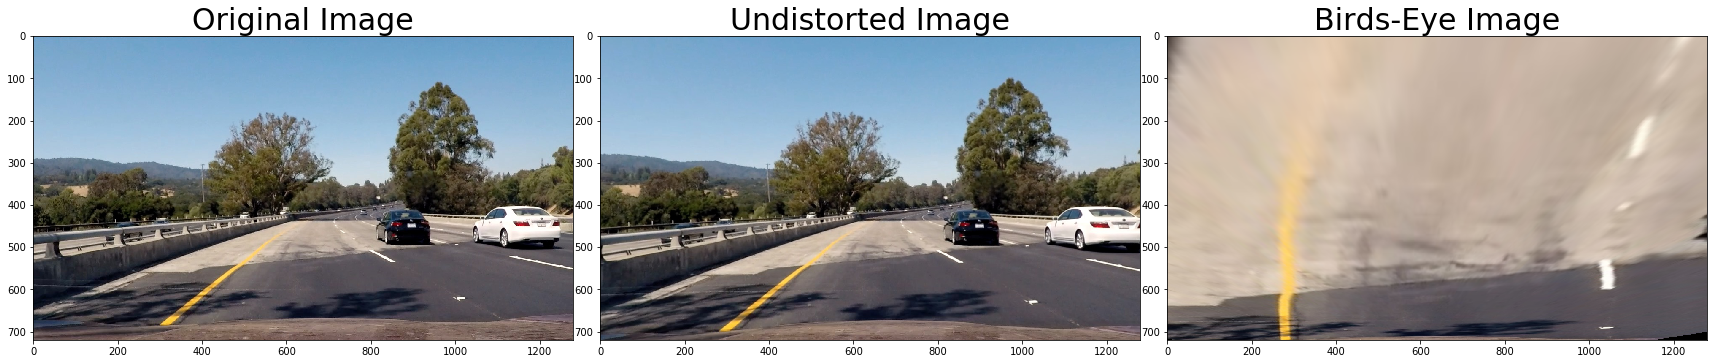

In [4]:
#######################################################################################################################
############################################# PERSPECTIVE TRANSFORM ###################################################
#######################################################################################################################

## Unwarp function returns an undistorted image, a birds-eye view of the image, the perspective transform matrix,
## and the inverse perspective transform matrix given an original image, source points, and destination points
def unwarp(original_image, source_points, destination_points):
    
    # Create a copy of the original image
    copy_img = np.copy(original_image)
    
    # Undistort image using cv2.undistort()
    undistorted_img = cv2.undistort(copy_img, mtx, dist, None, mtx)
    
    # Get image shape [h = image height, w = image width]
    h, w = original_image.shape[:2]

    # Define perspective transform matrix and inverse perspective transform matrix using cv2.getPerspectiveTransform()
    M = cv2.getPerspectiveTransform(source_points, destination_points)
    minv = cv2.getPerspectiveTransform(destination_points, source_points)
    
    # Warp image to get a birds-eye view of the image using cv2.warpPerpespective()
    birds_eye_img = np.copy(original_image)
    birds_eye_img = cv2.warpPerspective(undistorted_img, M, (w, h), flags=cv2.INTER_LINEAR)
    
    return undistorted_img, birds_eye_img, M, minv

## Example Image 1

# Call unwarp function to obtain undistorted image and birds-eye view of image
undistorted_img_example1, birds_eye_img_example1, M_example1, minv_example1 = unwarp(example_img1, src, dst)

# Visualize undistortion and birds-eye view
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(30,10))
f.subplots_adjust(hspace = .2, wspace=.05)
ax1.imshow(example_img1)
ax1.set_title('Original Image', fontsize=30)
ax2.imshow(undistorted_img_example1)
ax2.set_title('Undistorted Image', fontsize=30)
ax3.imshow(birds_eye_img_example1)
ax3.set_title('Birds-Eye Image', fontsize=30)

## Example Image 2

# Call unwarp function to obtain undistorted image and birds-eye view of image
undistorted_img_example2, birds_eye_img_example2, M_example2, minv_example2 = unwarp(example_img2, src, dst)

# Visualize undistortion and birds-eye view
f2, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(30,10))
f2.subplots_adjust(hspace = .2, wspace=.05)
ax1.imshow(example_img2)
ax1.set_title('Original Image', fontsize=30)
ax2.imshow(undistorted_img_example2)
ax2.set_title('Undistorted Image', fontsize=30)
ax3.imshow(birds_eye_img_example2)
ax3.set_title('Birds-Eye Image', fontsize=30)

print('Perspective Transform Test Complete')

Sobel Operation Test Complete


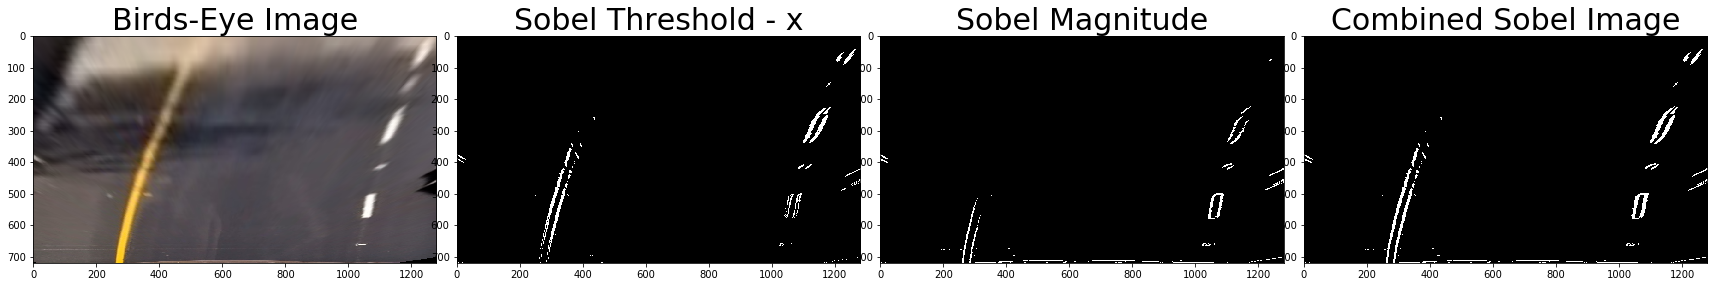

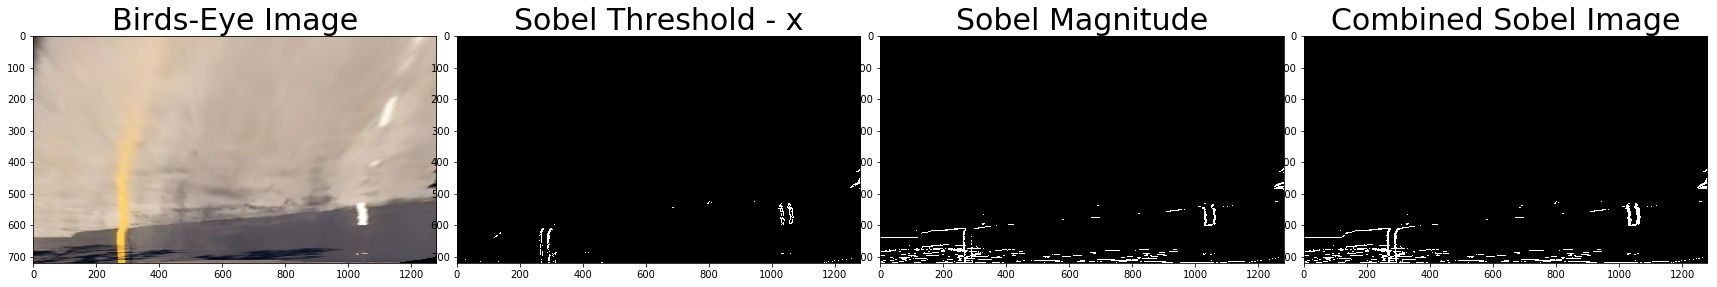

In [5]:
#######################################################################################################################
########################################### SOBEL THRESHOLD MODIFICATIONS #############################################
#######################################################################################################################

## Sobel Gradient Absolute Threshold
def abs_sobel_thresh(birds_eye_img, orient = 'x', thresh_min=0, thresh_max=255):
    
    # Create copy of image
    img = birds_eye_img
    
    # Convert to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    
    # Calculate the sobel operator
    if orient == 'x':
        sobel = cv2.Sobel(gray, cv2.CV_64F, 1, 0)
    elif orient == 'y':
        sobel = cv2.Sobel(gray, cv2.CV_64F, 0, 1)
    
    # Calculate absolute value
    abs_sobel = np.absolute(sobel)
    
    # Scale to 8-bit
    scaled_sobel = np.uint8(255*abs_sobel/np.max(abs_sobel))
    
    # Create binary mask
    sbinary = np.zeros_like(scaled_sobel)
    sbinary[(scaled_sobel >= thresh_min) & (scaled_sobel <= thresh_max)] = 1
    
    # Return mask as binary output
    binary_output = sbinary
    
    return binary_output

## Sobel Gradient Magnitude Threshold
def mag_threshold(birds_eye_img, sobel_kernel=3, mag_thresh=(0,255)):
    
    # Create copy of image
    img = birds_eye_img
    
    # Convert to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    
    # Take the gradient
    sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0)
    sobely = cv2.Sobel(gray, cv2.CV_64F, 0, 1)
    
    # Calculate the magnitude
    mag_sobel = np.sqrt(np.square(sobelx) + np.square(sobely))
    
    # Scale to 8-bit
    scaled_sobel = np.uint8(255*mag_sobel/np.max(mag_sobel))
    
    # Create binary mask
    sxbinary = np.zeros_like(scaled_sobel)
    sxbinary[(scaled_sobel >= mag_thresh[0]) & (scaled_sobel <= mag_thresh[1])] = 1

    # Return the binary mask as the output
    binary_output = np.copy(sxbinary)
    
    return binary_output

## Sobel Gradient Direction Threshold
def dir_threshold(birds_eye_img, sobel_kernel=7, thresh=(0, 0.1)):
    
    # Create copy of image
    img = birds_eye_img
    
    # Convert to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    
    # Calculate the sobel operator in x and y directions
    sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize = sobel_kernel)
    sobely = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize = sobel_kernel)
    
    # Calculate the absolute value of the x and y gradients
    abs_sobelx = np.absolute(sobelx)
    abs_sobely = np.absolute(sobely)
    
    # Calculate the direction
    grad_dir  = np.arctan2(abs_sobely, abs_sobelx)

    # Create binary mask
    dir_binary = np.zeros_like(grad_dir)
    dir_binary[(grad_dir >= thresh[0]) & (grad_dir <= thresh[1])] = 1

    # Return the binary mask as the output
    binary_output = np.copy(dir_binary)
    
    return binary_output

## Example Image 1

# Apply the absolute sobel operator on the birds-eye image in the x-direction
abs_sobel_thresh_imgx = abs_sobel_thresh(birds_eye_img_example1, orient='x', thresh_min = 40, thresh_max = 100)

# Apply the magnitude sobel operator on the birds-eye image
mag_thresh_img = mag_threshold(birds_eye_img_example1, mag_thresh = (30,100))

# Black out all colors in the range [0,0,0] to [75,255,255] to make the combined sobel image have less noise
black_color = cv2.inRange(cv2.cvtColor(birds_eye_img_example1, cv2.COLOR_BGR2HLS).astype(np.float), 
                          np.uint8([0,0,0]), np.uint8([75,255,255]))

# Combine the absolute sobel operator, the magnitude sobel operator, and the blacked out image
combined_sobel_img = np.zeros_like(mag_thresh_img)
combined_sobel_img[(((abs_sobel_thresh_imgx == 1) | (mag_thresh_img == 1)) & (black_color != 1))] = 1

# Visualize Sobel Operator
f, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(30,10))
f.subplots_adjust(hspace = .2, wspace=.05)
ax1.imshow(birds_eye_img_example1, cmap = 'gray')
ax1.set_title('Birds-Eye Image', fontsize=30)
ax2.imshow(abs_sobel_thresh_imgx, cmap = 'gray')
ax2.set_title('Sobel Threshold - x', fontsize=30)
ax3.imshow(mag_thresh_img, cmap = 'gray')
ax3.set_title('Sobel Magnitude', fontsize=30)
ax4.imshow(combined_sobel_img, cmap = 'gray')
ax4.set_title('Combined Sobel Image', fontsize=30)

## Example Image 2

# Apply the absolute sobel operator on the birds-eye image in the x-direction
abs_sobel_thresh_imgx2 = abs_sobel_thresh(birds_eye_img_example2, orient='x', thresh_min = 40, thresh_max = 100)

# Apply the magnitude sobel operator on the birds-eye image
mag_thresh_img2 = mag_threshold(birds_eye_img_example2, mag_thresh = (30,100))

# Black out all colors in the range [0,0,0] to [75,255,255] to make the combined sobel image have less noise
black_color2 = cv2.inRange(cv2.cvtColor(birds_eye_img_example2, cv2.COLOR_BGR2HLS).astype(np.float), 
                           np.uint8([0,0,0]), np.uint8([75,255,255]))

# Combine the absolute sobel operator, the magnitude sobel operator, and the blacked out image
combined_sobel_img2 = np.zeros_like(mag_thresh_img2)
combined_sobel_img2[(((abs_sobel_thresh_imgx2 == 1) | (mag_thresh_img2 == 1)) & (black_color2 != 1))] = 1  

# Visualize Sobel Operator
f2, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(30,10))
f2.subplots_adjust(hspace = .2, wspace=.05)
ax1.imshow(birds_eye_img_example2, cmap = 'gray')
ax1.set_title('Birds-Eye Image', fontsize=30)
ax2.imshow(abs_sobel_thresh_imgx2, cmap = 'gray')
ax2.set_title('Sobel Threshold - x', fontsize=30)
ax3.imshow(mag_thresh_img2, cmap = 'gray')
ax3.set_title('Sobel Magnitude', fontsize=30)
ax4.imshow(combined_sobel_img2, cmap = 'gray')
ax4.set_title('Combined Sobel Image', fontsize=30)

print('Sobel Operation Test Complete')

Color Modification Test Complete


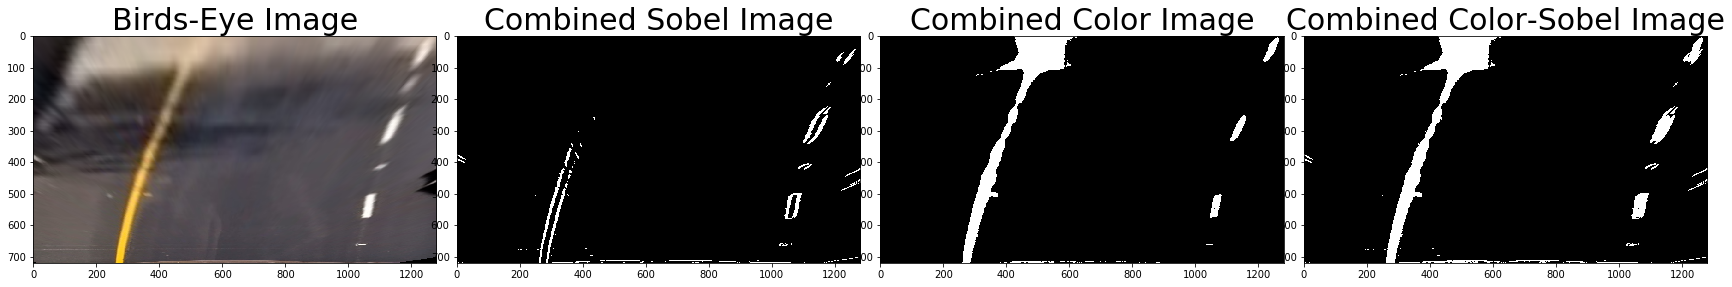

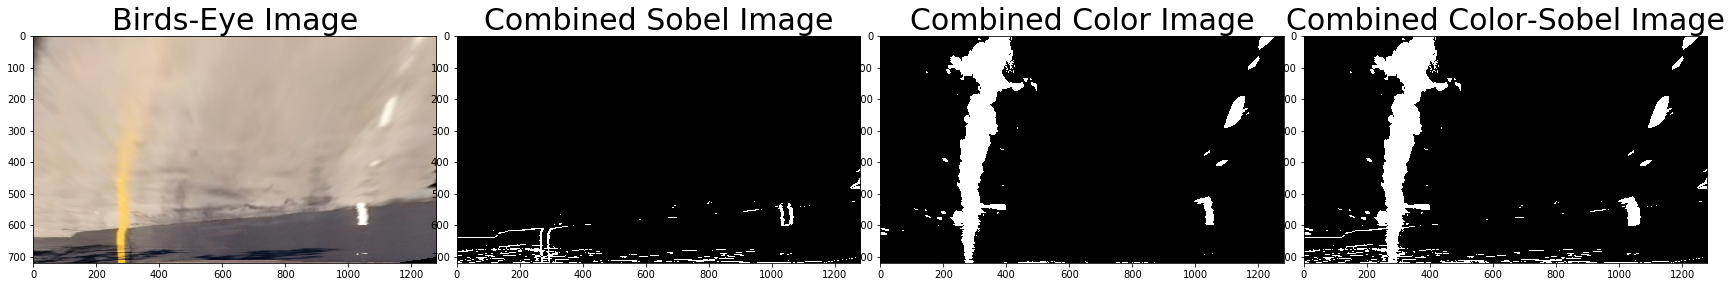

In [6]:
#######################################################################################################################
########################################### COLOR THRESHOLD MODIFICATIONS #############################################
#######################################################################################################################

## Combined Color Threshold
def combined_color_threshold(img, color_thresh_input):

    # Create yellow and white masks using the HLS and HSV color spaces, respectively
    white_mask = cv2.inRange(cv2.cvtColor(img, cv2.COLOR_BGR2HLS).astype(np.float), np.uint8([10,200,0]), np.uint8([255,255,255]))
    yellow_mask = cv2.inRange(cv2.cvtColor(img, cv2.COLOR_BGR2HSV).astype(np.float), np.uint8([15,60,130]), np.uint8([150,255,255]))
    
    # Combine yellow and white masks using cv2.bitwise_or()
    combined_color_mask = cv2.bitwise_or(white_mask, yellow_mask)
    
    # Convert to HLS color space and separate the L channel and the S channel
    l_channel = cv2.cvtColor(img, cv2.COLOR_BGR2HLS).astype(np.float)[:,:,1]
    s_channel = cv2.cvtColor(img, cv2.COLOR_BGR2HLS).astype(np.float)[:,:,2]
    
    # Create binary mask using S threshold color channel
    s_binary = np.zeros_like(s_channel)
    s_binary[(s_channel >= color_thresh_input[0]) & (s_channel <= color_thresh_input[1])] = 1

    # Create binary mask using the L threshold color channel
    l_binary = np.zeros_like(l_channel)
    l_binary[(l_channel >= 100) & (l_channel <= color_thresh_input[1])] = 1

    # Return a combined binary mask of the S and L threshold color channels, and the yellow and white masks
    combined_binary = np.zeros_like(s_channel)
    combined_binary[((s_binary > 0) & (l_binary > 0)) | (combined_color_mask > 0)] = 1

    return combined_binary

## Example Image 1

# Apply the combined color threshold on the birds-eye image
combined_color_img1 = combined_color_threshold(birds_eye_img_example1, color_thresh_input=(170, 255))

# Combine the combined sobel operator and the combined color threshold for a single binary image
combined_color_sobel_img1 = np.zeros_like(combined_sobel_img)
combined_color_sobel_img1[(combined_sobel_img == 1) | (combined_color_img1 == 1)] = 1

# Visualize Color Threshold
f, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(30,10))
f.subplots_adjust(hspace = .2, wspace=.05)
ax1.imshow(birds_eye_img_example1, cmap = 'gray')
ax1.set_title('Birds-Eye Image', fontsize=30)
ax2.imshow(combined_sobel_img, cmap = 'gray')
ax2.set_title('Combined Sobel Image', fontsize=30)
ax3.imshow(combined_color_img1, cmap = 'gray')
ax3.set_title('Combined Color Image', fontsize=30)
ax4.imshow(combined_color_sobel_img1, cmap = 'gray')
ax4.set_title('Combined Color-Sobel Image', fontsize=30)

## Example Image 2

# Apply the combined color threshold on the birds-eye image
combined_color_img2 = combined_color_threshold(birds_eye_img_example2, color_thresh_input=(170, 255))

# Combine the combined sobel operator and the combined color threshold for a single binary image
combined_color_sobel_img2 = np.zeros_like(combined_sobel_img2)
combined_color_sobel_img2[(combined_sobel_img2 == 1) | (combined_color_img2 == 1)] = 1

# Visualize Color Threshold
f2, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(30,10))
f2.subplots_adjust(hspace = .2, wspace=.05)
ax1.imshow(birds_eye_img_example2, cmap = 'gray')
ax1.set_title('Birds-Eye Image', fontsize=30)
ax2.imshow(combined_sobel_img2, cmap = 'gray')
ax2.set_title('Combined Sobel Image', fontsize=30)
ax3.imshow(combined_color_img2, cmap = 'gray')
ax3.set_title('Combined Color Image', fontsize=30)
ax4.imshow(combined_color_sobel_img2, cmap = 'gray')
ax4.set_title('Combined Color-Sobel Image', fontsize=30)

print('Color Modification Test Complete')

Histogram Test Complete


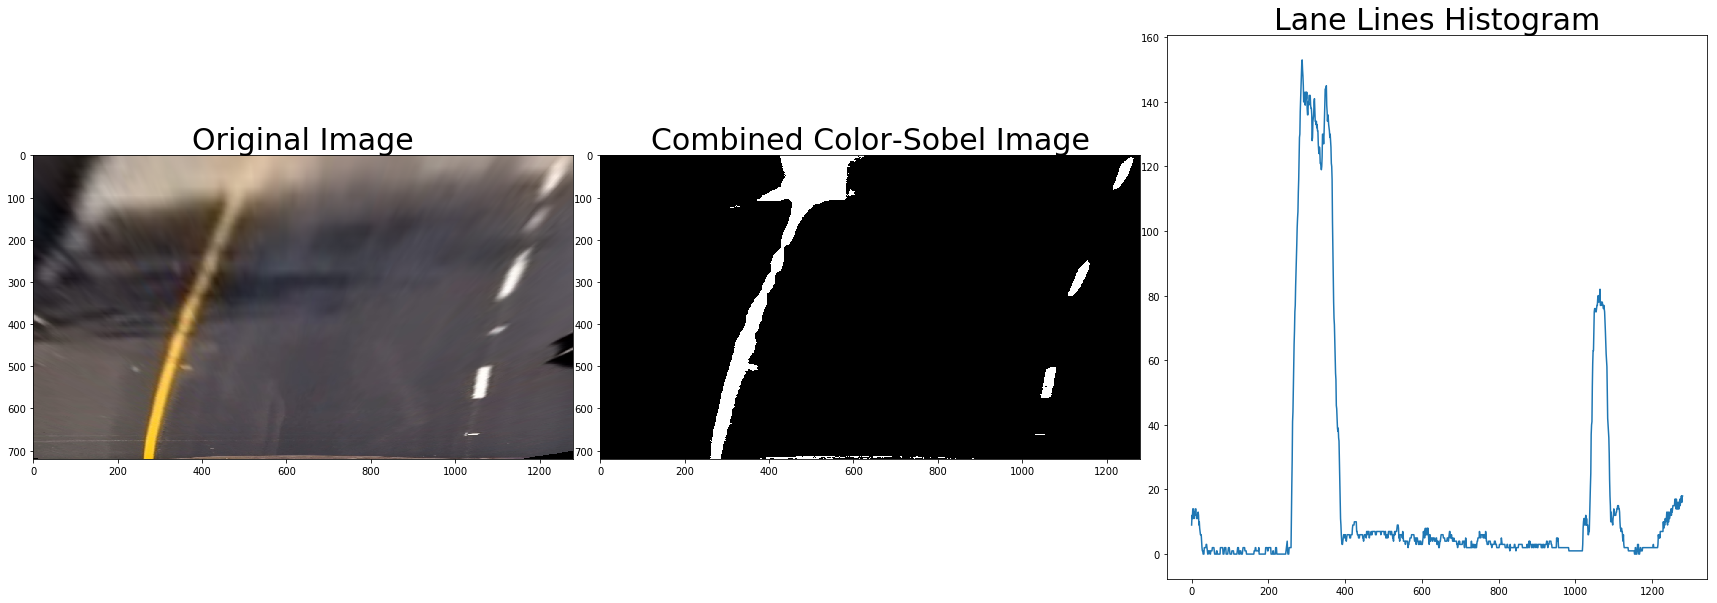

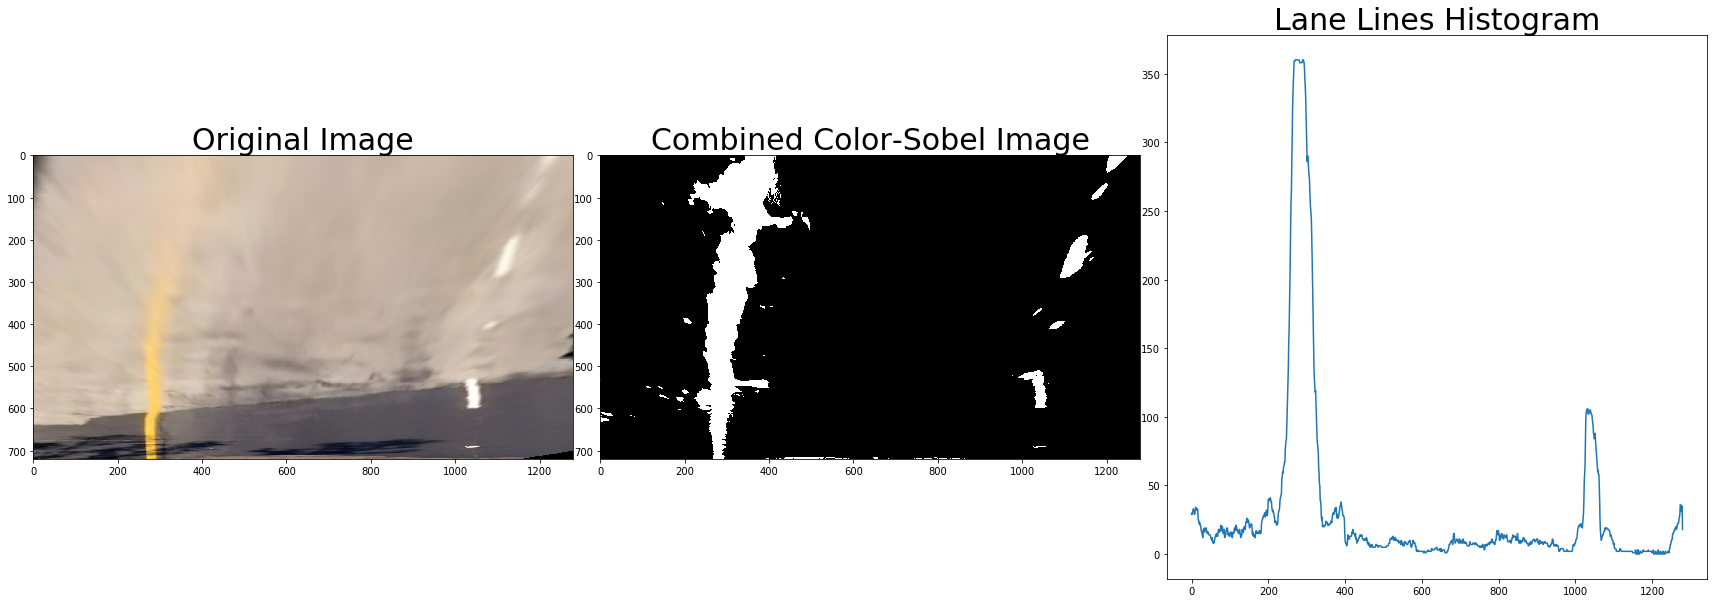

In [7]:
#######################################################################################################################
############################################ FINDING LINES WITH HISTOGRAM #############################################
#######################################################################################################################

## Histogram
def hist(img):
    
    # Grab only the bottom half of the image
    bottom_half = img[img.shape[0]//2:,:]
    
    # Sum across image pixels vertically
    histogram = np.sum(bottom_half, axis = 0)
    
    return histogram

## Example Image 1
example_histogram = hist(combined_color_sobel_img1)

# Visualize Color Threshold
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(30,10))
f.subplots_adjust(hspace = .2, wspace=.05)
ax1.imshow(birds_eye_img_example1, cmap = 'gray')
ax1.set_title('Original Image', fontsize=30)
ax2.imshow(combined_color_img1, cmap = 'gray')
ax2.set_title('Combined Color-Sobel Image', fontsize=30)
ax3.plot(example_histogram)
ax3.set_title('Lane Lines Histogram', fontsize=30)

## Example Image 2

example_histogram2 = hist(combined_color_sobel_img2)

# Visualize Color Threshold
f2, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(30,10))
f2.subplots_adjust(hspace = .2, wspace=.05)
ax1.imshow(birds_eye_img_example2, cmap = 'gray')
ax1.set_title('Original Image', fontsize=30)
ax2.imshow(combined_color_img2, cmap = 'gray')
ax2.set_title('Combined Color-Sobel Image', fontsize=30)
ax3.plot(example_histogram2)
ax3.set_title('Lane Lines Histogram', fontsize=30)

print('Histogram Test Complete')

... Sliding Windows Test Complete ...


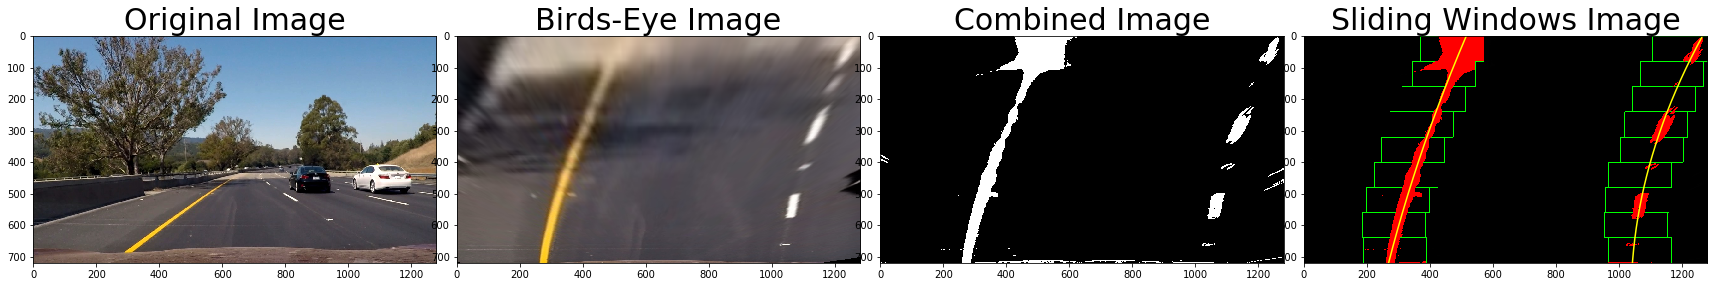

In [8]:
#######################################################################################################################
####################################### FINDING LINES WITH SLIDING WINDOWS ############################################
#######################################################################################################################

## Sliding windows
def slide_windows(combined_color_sobel_img):

    # Create copy of image
    img = np.copy(combined_color_sobel_img)
    
    # Calculate the histogram
    histogram = np.sum(img[img.shape[0]//2:,:], axis=0)
    
    # Create an output image
    out_img = np.dstack((img, img, img))
    
    # Find the peaks of the histogram
    midpoint = np.int(histogram.shape[0]//2)
    leftx_base = np.argmax(histogram[:midpoint])
    rightx_base = np.argmax(histogram[midpoint:]) + midpoint
    
    # HYPERPARAMETERS
    # Number of sliding windows
    nwindows = 9
    # Width of the windows +/- margin
    margin = 100
    # Minimum number of pixels found to recenter window
    minpix = 50

    # Set height of windows - based on nwindows above and image shape
    window_height = np.int(img.shape[0]//nwindows)
    
    # Identify the x and y positions of all nonzero pixels in the image
    nonzero = img.nonzero()
    nonzeroy = np.array(nonzero[0])
    nonzerox = np.array(nonzero[1])
    
    # Current positions to be updated later for each window in nwindows
    leftx_current = leftx_base
    rightx_current = rightx_base
    
    # Create empty lists to receive left and right lane pixel indices
    left_lane_inds = []
    right_lane_inds = []
    
    # Step through windows one by one
    for window in range(nwindows):
        
        # Identify window boundaries in x and y
        win_y_low = img.shape[0] - (window+1)*window_height
        win_y_high = img.shape[0] - window*window_height
        
        win_xleft_low = leftx_current - margin
        win_xleft_high = leftx_current + margin
        win_xright_low = rightx_current - margin
        win_xright_high = rightx_current + margin
        
        # Draw the windows on the visualization image
        cv2.rectangle(out_img, (win_xleft_low, win_y_low), (win_xleft_high, win_y_high), (0, 255, 0), 2)
        cv2.rectangle(out_img, (win_xright_low, win_y_low), (win_xright_high, win_y_high), (0, 255, 0), 2)
    
        # Identify the nonzero pixels in x and y within the window
        good_left_inds = ((nonzeroy >= win_y_low) & (nonzeroy < win_y_high) & 
                          (nonzerox >= win_xleft_low) & (nonzerox < win_xleft_high)).nonzero()[0]
        good_right_inds = ((nonzeroy >= win_y_low) & (nonzeroy < win_y_high) & 
                           (nonzerox >= win_xright_low) & (nonzerox < win_xright_high)).nonzero()[0]
        
        # Append these indices to the lists
        left_lane_inds.append(good_left_inds)
        right_lane_inds.append(good_right_inds)
        
        # If more than minpix pixels have been found, recenter next window on their mean position
        if len(good_left_inds) > minpix:
            leftx_current = np.int(np.mean(nonzerox[good_left_inds]))
        if len(good_right_inds) > minpix:
            rightx_current = np.int(np.mean(nonzerox[good_right_inds]))
            
    # Concatenate the arrays of indices (previously was a list of lists of pixels)
    try:
        left_lane_inds = np.concatenate(left_lane_inds)
        right_lane_inds = np.concatenate(right_lane_inds)
    except ValueError:
        # Avoids an error if the above is not implemented fully
        pass
    
    # Extract left and right lane pixel positions
    leftx = nonzerox[left_lane_inds]
    lefty = nonzeroy[left_lane_inds]
    rightx = nonzerox[right_lane_inds]
    righty = nonzeroy[right_lane_inds]
    
    return leftx, lefty, rightx, righty, out_img, left_lane_inds, right_lane_inds
    
## Polynomial fit
def fit_poly(combined_color_sobel_img):
    
    leftx, lefty, rightx, righty, out_img, left_lane_inds, right_lane_inds = slide_windows(combined_color_sobel_img)
    
    # Fit a second order polynomial to each of the lines
    left_fit = np.polyfit(lefty, leftx, 2)
    right_fit = np.polyfit(righty, rightx, 2)
    
    # Generate x and y values for plotting
    ploty = np.linspace(0, img.shape[0]-1, img.shape[0] )
    try:
        left_fitx = left_fit[0]*ploty**2 + left_fit[1]*ploty + left_fit[2]
        right_fitx = right_fit[0]*ploty**2 + right_fit[1]*ploty + right_fit[2]
    except TypeError:
        # Avoids an error if `left` and `right_fit` are still none or incorrect
        print('The function failed to fit a line!')
        left_fitx = 1*ploty**2 + 1*ploty
        right_fitx = 1*ploty**2 + 1*ploty

    ## Visualization ##
    # Colors in the left and right lane regions
    out_img[lefty, leftx] = [255, 0, 0]
    out_img[righty, rightx] = [255, 0, 0]
    
    return out_img, left_fit, right_fit, left_fitx, right_fitx, ploty, left_lane_inds, right_lane_inds

## Example Image 1
out_img, left_fit, right_fit, left_fitx, right_fitx, ploty, left_lane_inds, right_lane_inds = fit_poly(combined_color_sobel_img1)

# Visualize Sliding Windows Method
f, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(30,10))
f.subplots_adjust(hspace = .2, wspace=.05)
ax1.imshow(example_img1)
ax1.set_title('Original Image', fontsize=30)
ax2.imshow(birds_eye_img_example1)
ax2.set_title('Birds-Eye Image', fontsize=30)
ax3.imshow(combined_color_sobel_img1, cmap = 'gray')
ax3.set_title('Combined Image', fontsize=30)
ax4.imshow(out_img)
ax4.set_title('Sliding Windows Image', fontsize=30)
ax4.plot(left_fitx, ploty, color='yellow')
ax4.plot(right_fitx, ploty, color='yellow')

print('... Sliding Windows Test Complete ...')



Search Around Poly Test Complete


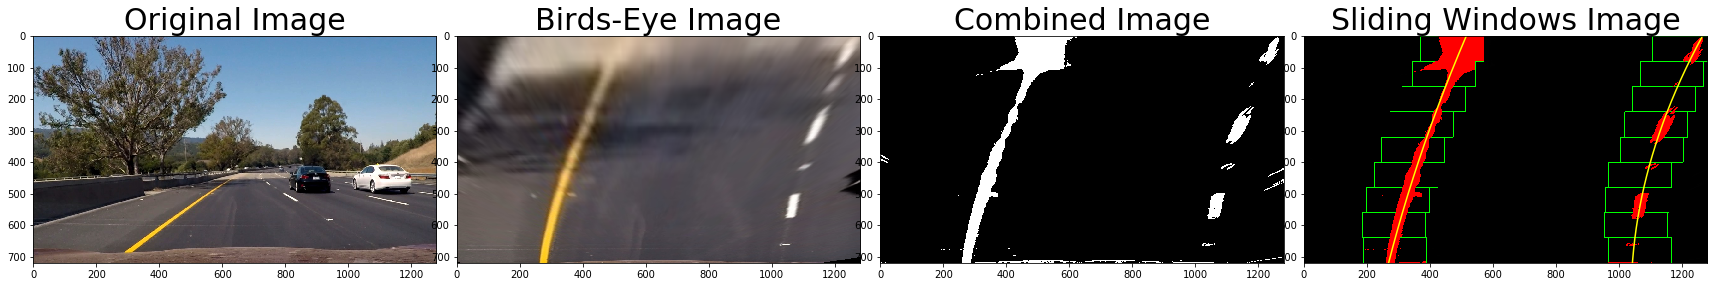

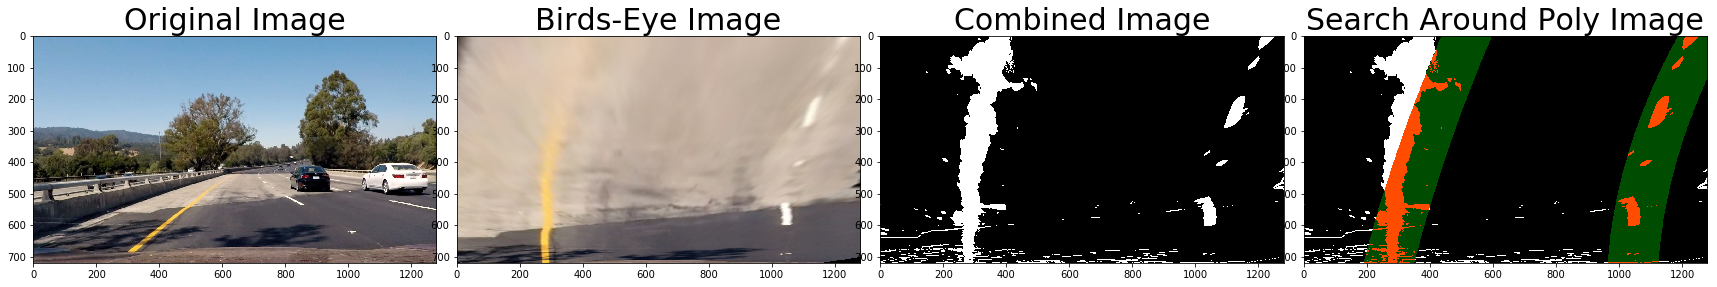

In [9]:
#######################################################################################################################
#################################### FINDING LINES WITH SEARCH AROUND POLY ############################################
#######################################################################################################################

def search_around_poly(img, prev_left_fit, prev_right_fit):

    # Search margin width
    margin = 80
    
    # Grab activated pixels
    nonzero = img.nonzero()
    nonzeroy = np.array(nonzero[0])
    nonzerox = np.array(nonzero[1])
    
    # Search area based on activated x-values
    left_lane_inds = ((nonzerox > (prev_left_fit[0]*(nonzeroy**2) + prev_left_fit[1]*nonzeroy + prev_left_fit[2] - margin)) &
                     (nonzerox < (prev_left_fit[0]*(nonzeroy**2) + prev_left_fit[1]*nonzeroy + prev_left_fit[2] + margin)))
    right_lane_inds = ((nonzerox > (prev_right_fit[0]*(nonzeroy**2) + prev_right_fit[1]*nonzeroy + prev_right_fit[2] - margin)) &
                     (nonzerox < (prev_right_fit[0]*(nonzeroy**2) + prev_right_fit[1]*nonzeroy + prev_right_fit[2] + margin)))
    
    # Extract the left and right line pixel positions
    leftx = nonzerox[left_lane_inds]
    lefty = nonzeroy[left_lane_inds]
    rightx = nonzerox[right_lane_inds]
    righty = nonzeroy[right_lane_inds]
    
    left_fit2, right_fit2 = (None, None)
    if len(leftx) != 0:
        left_fit2 = np.polyfit(lefty, leftx, 2)
    if len(rightx) != 0:
        right_fit2 = np.polyfit(righty, rightx, 2)
    
    ploty = np.linspace(0, img.shape[0]-1, img.shape[0] )
    left_fitx = left_fit[0]*ploty**2 + left_fit[1]*ploty + left_fit[2]
    right_fitx = right_fit[0]*ploty**2 + right_fit[1]*ploty + right_fit[2]
    left_fitx2 = left_fit2[0]*ploty**2 + left_fit2[1]*ploty + left_fit2[2]
    right_fitx2 = right_fit2[0]*ploty**2 + right_fit2[1]*ploty + right_fit2[2]

    # Create an image to draw on and an image to show the selection window
    out_img = np.uint8(np.dstack((img, img, img))*255)

    out_img[nonzeroy[left_lane_inds], nonzerox[left_lane_inds]] = [255, 0, 0]
    out_img[nonzeroy[right_lane_inds], nonzerox[right_lane_inds]] = [255, 0, 0]
    
    # Color in left and right line pixels
    nonzero = img.nonzero()
    nonzeroy = np.array(nonzero[0])
    nonzerox = np.array(nonzero[1])
    
    window_img = np.zeros_like(out_img)

    # Generate a polygon to illustrate the search window area
    # And recast the x and y points into usable format for cv2.fillPoly()
    left_line_window1 = np.array([np.transpose(np.vstack([left_fitx-margin, ploty]))])
    left_line_window2 = np.array([np.flipud(np.transpose(np.vstack([left_fitx + margin, ploty])))])
    left_line_pts = np.hstack((left_line_window1, left_line_window2))
    right_line_window1 = np.array([np.transpose(np.vstack([right_fitx-margin, ploty]))])
    right_line_window2 = np.array([np.flipud(np.transpose(np.vstack([right_fitx + margin, ploty])))])
    right_line_pts = np.hstack((right_line_window1, right_line_window2))

    # Draw the lane onto the warped blank image
    cv2.fillPoly(window_img, np.int_([left_line_pts]), (0,255, 0))
    cv2.fillPoly(window_img, np.int_([right_line_pts]), (0,255, 0))
    result = cv2.addWeighted(out_img, 1, window_img, 0.3, 0)
    
    return result, left_fit2, right_fit2, left_lane_inds, right_lane_inds
    
## Visualization ##

# Example
margin = 80
out_img2, left_fit2, right_fit2, left_lane_inds2, right_lane_inds2 = search_around_poly(combined_color_sobel_img2, left_fit, right_fit)

# Visualize Sliding Windows Method
f, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(30,10))
f.subplots_adjust(hspace = .2, wspace=.05)
ax1.imshow(example_img1)
ax1.set_title('Original Image', fontsize=30)
ax2.imshow(birds_eye_img_example1)
ax2.set_title('Birds-Eye Image', fontsize=30)
ax3.imshow(combined_color_sobel_img1, cmap = 'gray')
ax3.set_title('Combined Image', fontsize=30)
ax4.imshow(out_img)
ax4.set_title('Sliding Windows Image', fontsize=30)
ax4.plot(left_fitx, ploty, color='yellow')
ax4.plot(right_fitx, ploty, color='yellow')

# Visualize Sliding Windows Method
f2, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(30,10))
f2.subplots_adjust(hspace = .2, wspace=.05)
ax1.imshow(example_img2)
ax1.set_title('Original Image', fontsize=30)
ax2.imshow(birds_eye_img_example2)
ax2.set_title('Birds-Eye Image', fontsize=30)
ax3.imshow(combined_color_sobel_img2, cmap = 'gray')
ax3.set_title('Combined Image', fontsize=30)
ax4.imshow(out_img2)
ax4.set_title('Search Around Poly Image', fontsize=30)

print('Search Around Poly Test Complete')


In [12]:
#######################################################################################################################
########################################### LINE CURVATURE MEASUREMENT ################################################
#######################################################################################################################

## Lane Curvature Measurement
def measure_curvature(img, left_fit, right_fit, left_lane_inds, right_lane_inds):
    
    # Define conversions in x and y from pixels space to meters
    ym_per_pix = 30/720 # meters per pixel in y dimension
    xm_per_pix = 3.7/700 # meters per pixel in x dimension
    left_curverad, right_curverad  = (0, 0)
    h = img.shape[0]
    w = img.shape[1]
    ploty = np.linspace(0, h-1, h)
    y_eval = np.max(ploty)
    
    # Identify the x and y positions of all nonzero pixels in the image
    nonzero = img.nonzero()
    nonzeroy = np.array(nonzero[0])
    nonzerox = np.array(nonzero[1])
    
    # Extract left and right line pixel positions
    leftx = nonzerox[left_lane_inds]
    lefty = nonzeroy[left_lane_inds] 
    rightx = nonzerox[right_lane_inds]
    righty = nonzeroy[right_lane_inds]
    
    if ((len(leftx) != 0) and (len(rightx) != 0)):
        # Fit new polynomials to x,y in world space
        left_fit_cr = np.polyfit(lefty*ym_per_pix, leftx*xm_per_pix, 2)
        right_fit_cr = np.polyfit(righty*ym_per_pix, rightx*xm_per_pix, 2)
        left_curverad = ((1 + (2*left_fit_cr[0]*y_eval*ym_per_pix + left_fit_cr[1])**2)**1.5) / np.absolute(2*left_fit_cr[0])
        right_curverad = ((1 + (2*right_fit_cr[0]*y_eval*ym_per_pix + right_fit_cr[1])**2)**1.5) / np.absolute(2*right_fit_cr[0])

    return left_curverad, right_curverad

... Sliding Windows Test Complete ...


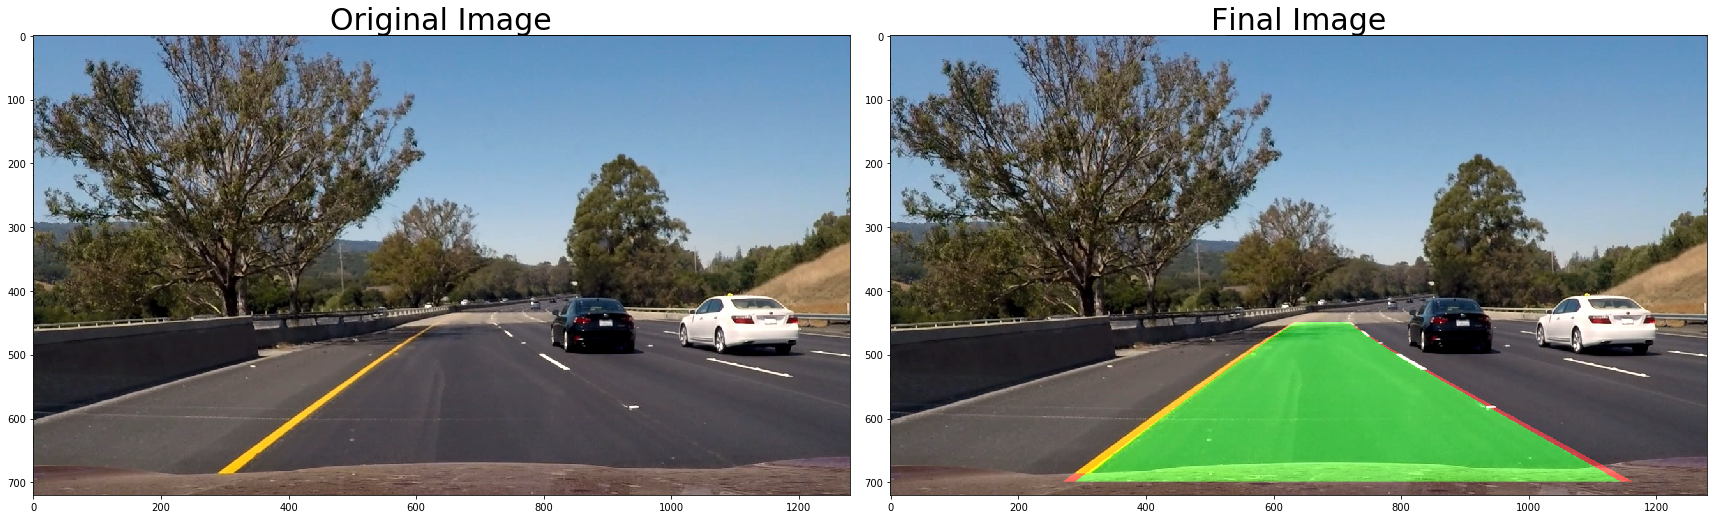

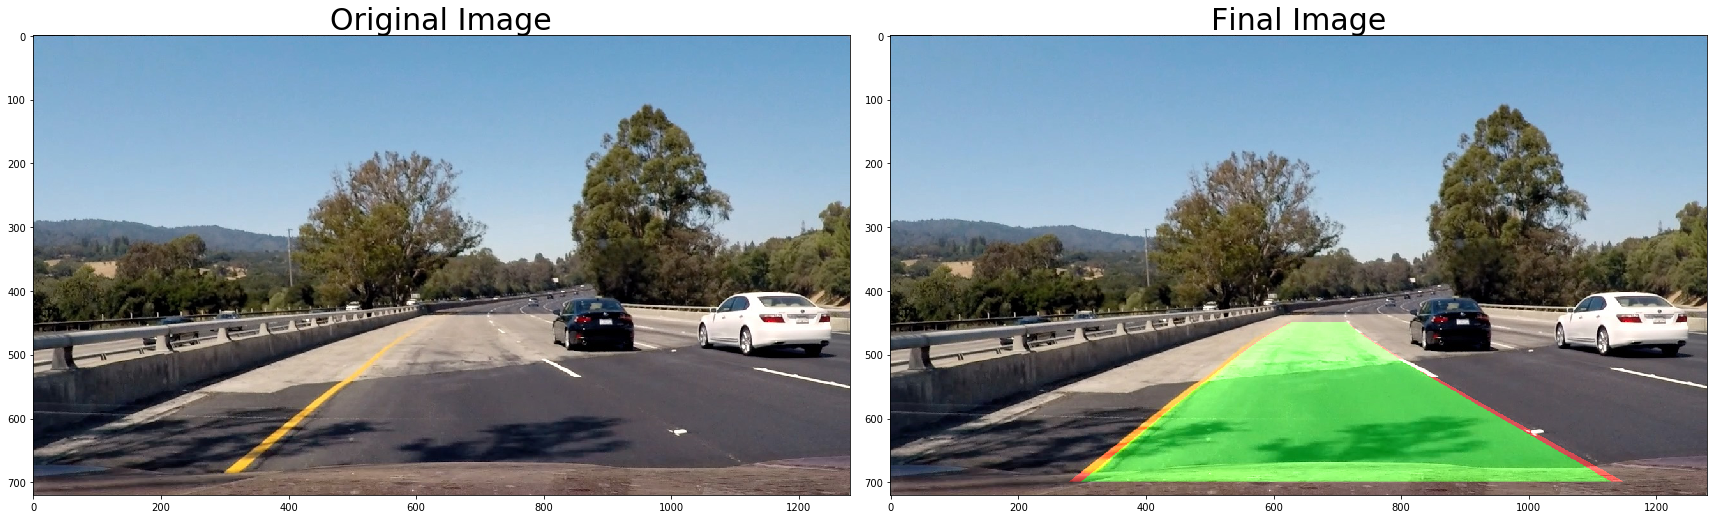

In [13]:
#######################################################################################################################
######################################### DRAWING LANES ON OUTPUT IMAGE ###############################################
#######################################################################################################################

def draw_lines(img1, img2, left_fit, right_fit, minv):
    
    new_img = np.copy(img1)
    new_img2 = np.copy(img2)
    
    if left_fit is None or right_fit is None:
        return img1
    
    # Create an image to draw the lines on
    warp_zero = np.zeros_like(img2).astype(np.uint8)
    color_warp = np.dstack((warp_zero, warp_zero, warp_zero))
    
    h,w = img2.shape[:2]
    ploty = np.linspace(0, h-1, num=h)# to cover same y-range as image
    left_fitx = left_fit[0]*ploty**2 + left_fit[1]*ploty + left_fit[2]
    right_fitx = right_fit[0]*ploty**2 + right_fit[1]*ploty + right_fit[2]

    # Recast the x and y points into usable format for cv2.fillPoly()
    pts_left = np.array([np.transpose(np.vstack([left_fitx, ploty]))])
    pts_right = np.array([np.flipud(np.transpose(np.vstack([right_fitx, ploty])))])
    pts = np.hstack((pts_left, pts_right))

    # Draw the lane onto the warped blank image
    cv2.fillPoly(color_warp, np.int_([pts]), (0,255, 0))
    cv2.polylines(color_warp, np.int32([pts_left]), isClosed=False, color=(255,0,0), thickness=15)
    cv2.polylines(color_warp, np.int32([pts_right]), isClosed=False, color=(255,0,0), thickness=15)

    # Warp the blank back to original image space using inverse perspective matrix (Minv)
    new_warp = cv2.warpPerspective(color_warp, minv, (w, h))
    
    # Combine the result with the original image
    result = cv2.addWeighted(new_img, 1, new_warp, 0.5, 0)
    
    return result

## Example Image 1
final_img1 = draw_lines(example_img1, combined_color_sobel_img1, left_fit, right_fit, minv_example1)

# Visualize Final Image
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(30,10))
f.subplots_adjust(hspace = .2, wspace=.05)
ax1.imshow(example_img1)
ax1.set_title('Original Image', fontsize=30)
ax2.imshow(final_img1)
ax2.set_title('Final Image', fontsize=30)

## Example Image 2
final_img2 = draw_lines(example_img2, combined_color_sobel_img2, left_fit2, right_fit2, minv_example2)

# Visualize Final Image
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(30,10))
f.subplots_adjust(hspace = .2, wspace=.05)
ax1.imshow(example_img2)
ax1.set_title('Original Image', fontsize=30)
ax2.imshow(final_img2)
ax2.set_title('Final Image', fontsize=30)

print('... Sliding Windows Test Complete ...')

NameError: name 'Line' is not defined

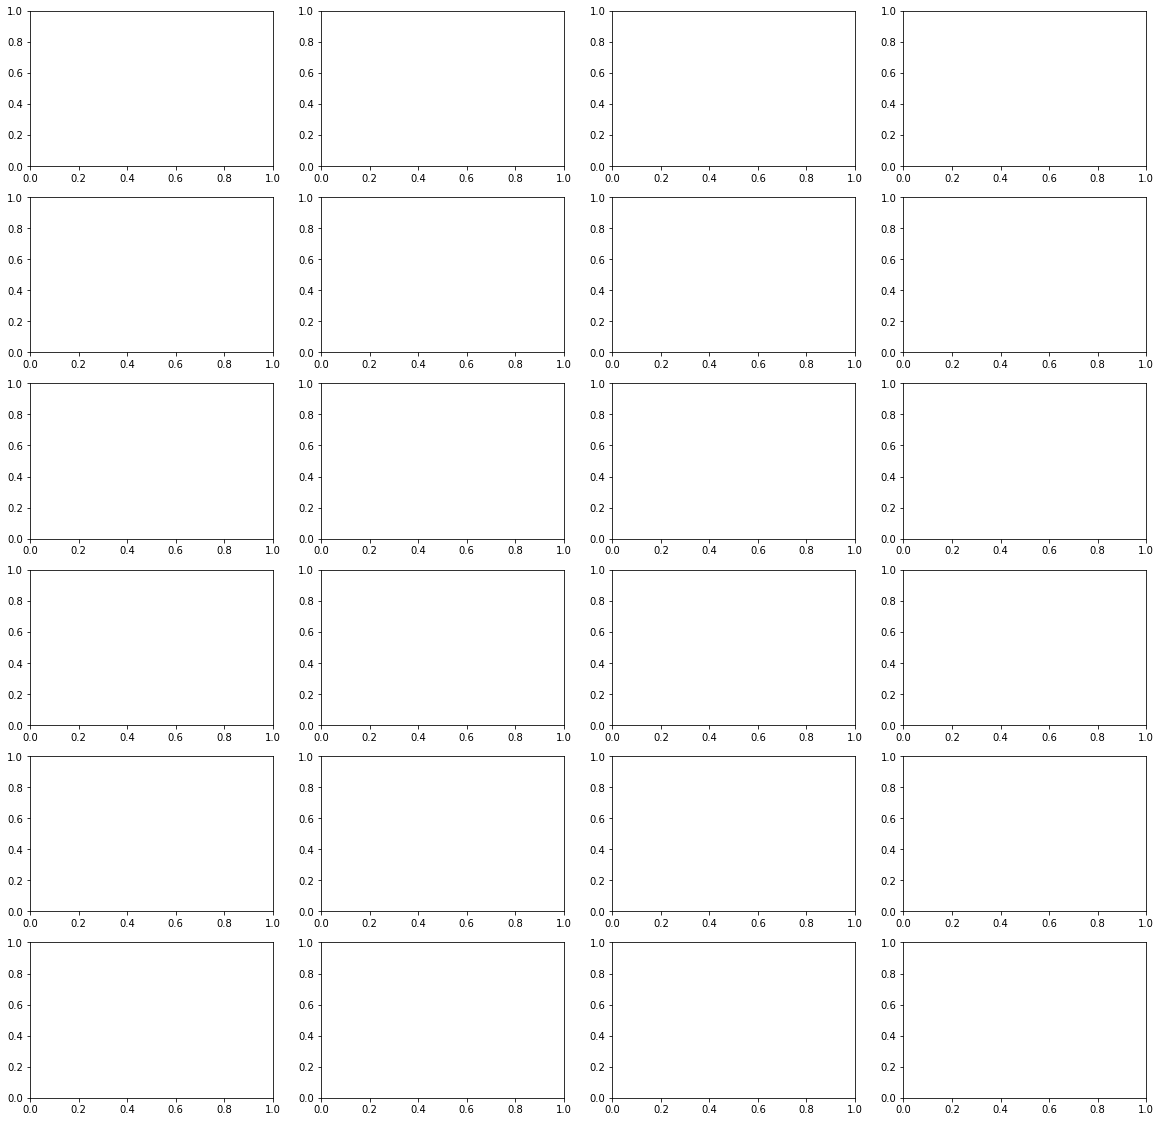

In [14]:
#######################################################################################################################
############################################# TEST IMAGE PIPELINE #####################################################
#######################################################################################################################

# Create figure
f,axes= plt.subplots(6,4, figsize=(20,20))
row=0

# Create line instances
left_test = Line()
right_test = Line()

# Import all test images
test_images = glob.glob('./test_images/test*.jpg')

for i, test_image in enumerate(test_images):
    
    # Read in the image
    img_test = cv2.imread(test_image)
    
    # Copy the image
    new_img_test = np.copy(img_test)
    
    # Convert to RGB color
    color_img_test = cv2.cvtColor(img_test, cv2.COLOR_BGR2RGB)
    
    # Create copy of image for birds-eye view image later on
    topdown_img_test = np.copy(img_test)

    # Define shape of image [h = height, w = width]
    h_test, w_test = img_test.shape[:2]

    # Define source and destination points using width of image, height of image, and offset
    offset = 200
    src = np.float32([(593,450),(700,450),(1200,700),(200,700)])
    dst = np.float32([(offset,0),(w_test-offset,0),(w_test-offset,h_test),(offset,h_test)])

    # Unwarp image to get perspective transform
    undistorted_img_test, birds_eye_img_test, M_test, minv_test = unwarp(color_img_test, src, dst)
    
    # Apply the absolute sobel operator on the birds-eye image in the x-direction
    abs_sobel_thresh_imgx_test = abs_sobel_thresh(birds_eye_img_test, orient='x', thresh_min = 40, thresh_max = 100)

    # Apply the magnitude sobel operator on the birds-eye image
    mag_thresh_img_test = mag_threshold(birds_eye_img_test, mag_thresh = (30,100))

    # Black out all colors in the range [0,0,0] to [75,255,255] to make the combined sobel image have less noise
    black_color_test = cv2.inRange(cv2.cvtColor(birds_eye_img_test, cv2.COLOR_BGR2HLS).astype(np.float), 
                          np.uint8([0,0,0]), np.uint8([75,255,255]))

    # Combine the absolute sobel operator, the magnitude sobel operator, and the blacked out image
    combined_sobel_img_test = np.zeros_like(mag_thresh_img_test)
    combined_sobel_img_test[(((abs_sobel_thresh_imgx_test == 1) | (mag_thresh_img_test == 1)) & 
                             (black_color_test != 1))] = 1
    
    # Apply the combined color threshold on the birds-eye image
    combined_color_img_test = combined_color_threshold(birds_eye_img_test, color_thresh_input=(170, 255))

    # Combine the combined sobel operator and the combined color threshold for a single binary image
    combined_color_sobel_img_test = np.zeros_like(combined_sobel_img_test)
    combined_color_sobel_img_test[(combined_sobel_img_test == 1) | (combined_color_img_test == 1)] = 1
    
    left_test.current_fit = []
    right_test.curent_fit = []
    
    if (left_test.current_fit == []) or (right_test.current_fit == []):
        out_img_test, left_test.current_fit, right_test.current_fit, left_fitx, right_fitx, ploty, left_lane_inds_test, right_lane_inds_test = fit_poly(combined_color_sobel_img_test)
        final_img_test = draw_lines(undistorted_img_test, combined_color_sobel_img_test, left_test.current_fit, right_test.current_fit, minv_test)
        print('sliding windows')
    else:
        out_img_test, left_test.current_fit, right_test.current_fit, left_lane_inds, right_lane_inds = search_around_poly(combined_color_sobel_img_test, left_test.previous_fit, right_test.previous_fit)
        final_img_test = draw_lines(undistorted_img_test, combined_color_sobel_img_test, left_test.current_fit, right_test.current_fit, minv_test)
        print('search around poly')
    
    left_test.previous_fit = left_test.current_fit
    right_test.previous_fit = right_test.current_fit
    
    left_curverad_test, right_curverad_test = measure_curvature(combined_color_sobel_img_test, left_test.current_fit, right_test.current_fit, left_lane_inds_test, right_lane_inds_test)
    
    final_img_test_copy = np.zeros_like(final_img_test)
    font = cv2.FONT_HERSHEY_COMPLEX_SMALL
    
    text = 'Left Curve Radius: ' + '{:04.2f}'.format(left_curverad_test) + 'm'
    cv2.putText(final_img_test, text, (40,70), font, 1.5, (255,255,255), 2, cv2.LINE_AA)
    cv2.putText(final_img_test_copy, text, (40,100), font, 4.0, (255,255,255), 3, cv2.LINE_AA)
    
    text = 'Right Curve Radius: ' + '{:04.2f}'.format(right_curverad_test) + 'm'
    cv2.putText(final_img_test, text, (700,70), font, 1.5, (255,255,255), 2, cv2.LINE_AA)
    cv2.putText(final_img_test_copy, text, (700,100), font, 4.0, (255,255,255), 3, cv2.LINE_AA)
    
    axes[row,0].imshow(color_img_test)
    axes[row,1].imshow(combined_color_sobel_img_test, cmap='gray')
    axes[row,2].imshow(out_img_test)
    axes[row,3].imshow(final_img_test)
    row+=1

In [ ]:
#######################################################################################################################
####################################################### LINE CLASS ####################################################
#######################################################################################################################

class Line():
    def __init__(self):
        
        # Stores current fit data
        self.current_fit = []
        # Stores previous fit data
        self.previous_fit = []
        # Stores best fit data
        self.best_fit = []


In [ ]:
def pipeline(img_pipeline):
    
    # Call backend pipeline to run initial image to binary image
    combined_color_sobel_img_pipeline, undistorted_img_pipeline, minv_pipeline = backend_pipeline(img_pipeline)
    
    # If there is no current fit for either line, run sliding windows method
    if ((left.current_fit == []) or (right.current_fit == [])):
        
        # Sliding windows method for finding lane lines
        out_img_pipeline, left.current_fit, right.current_fit, left_fitx, right_fitx, ploty, left_lane_inds_pipeline, right_lane_inds_pipeline = fit_poly(combined_color_sobel_img_pipeline)
        
        # Draw lines method using values found from sliding windows method
        final_img_pipeline = draw_lines(undistorted_img_pipeline, combined_color_sobel_img_pipeline, left.current_fit, right.current_fit, minv_pipeline)                              
    
    # If there is a current fit for either line, try to run search around poly
    elif((left.current_fit != []) or (right.current_fit != [])):
        try:
            # Search around poly method for finding lane lines
            out_img_pipeline, left.current_fit, right.current_fit, left_lane_inds_pipeline, right_lane_inds_pipeline = search_around_poly(combined_color_sobel_img_pipeline, left.previous_fit, right.previous_fit)
            
            # Draw lines method using values found from search around poly method
            final_img_pipeline = draw_lines(undistorted_img_pipeline, combined_color_sobel_img_pipeline, left.current_fit, right.current_fit, minv_pipeline)
        
        # IF ERROR OCCURS DURING SEARCH AROUND POLY METHOD PASS ERROR AND RUN SLIDING WINDOWS METHOD
        except TypeError:
             pass
    else:
        # Sliding windows method for finding lane lines
        out_img_pipeline, left.current_fit, right.current_fit, left_fitx, right_fitx, ploty, left_lane_inds_pipeline, right_lane_inds_pipeline = fit_poly(combined_color_sobel_img_pipeline)
        
        # Draw lines method using values found from sliding windows method
        final_img_pipeline = draw_lines(undistorted_img_pipeline, combined_color_sobel_img_pipeline, left.current_fit, right.current_fit, minv_pipeline) 
    
    # Set previous fit equal to current fit
    left.previous_fit = left.current_fit
    right.previous_fit = right.current_fit
    
    # Measure curvature using current fit values
    left_curverad_pipeline, right_curverad_pipeline = measure_curvature(combined_color_sobel_img_pipeline, left.current_fit, right.current_fit, left_lane_inds_pipeline, right_lane_inds_pipeline)
    
    # Output final image containing curvature data, and binary images stacked on output image
    final_img_pipeline_copy = np.zeros_like(final_img_pipeline)
    font = cv2.FONT_HERSHEY_COMPLEX_SMALL
    
    # Left curvature data
    text = 'Left Curve Radius: ' + '{:04.2f}'.format(left_curverad_pipeline) + 'm'
    cv2.putText(final_img_pipeline, text, (40,70), font, 1.5, (255,255,255), 2, cv2.LINE_AA)
    cv2.putText(final_img_pipeline_copy, text, (40,100), font, 4.0, (255,255,255), 3, cv2.LINE_AA)
    
    # Right curvature data
    text = 'Right Curve Radius: ' + '{:04.2f}'.format(right_curverad_pipeline) + 'm'
    cv2.putText(final_img_pipeline, text, (700,70), font, 1.5, (255,255,255), 2, cv2.LINE_AA)
    cv2.putText(final_img_pipeline_copy, text, (700,100), font, 4.0, (255,255,255), 3, cv2.LINE_AA)
    
    # Return final image
    final_img_pipeline[110:280,40:340,:] = cv2.resize(np.dstack((combined_color_sobel_img_pipeline*255, combined_color_sobel_img_pipeline*255, combined_color_sobel_img_pipeline*255)),(300,170))#side Panel
    final_img_pipeline[110:280,960:1260,:] = cv2.resize(out_img_pipeline,(300,170))

    return final_img_pipeline

In [ ]:
def backend_pipeline(img_pipeline):
    #global counter
    
    # Copy the image
    new_img_pipeline = np.copy(img_pipeline)
    
    # Define shape of image [h = height, w = width]
    h_pipeline, w_pipeline = img_pipeline.shape[:2]

    # Define source and destination points using width of image, height of image, and offset
    offset = 200
    src = np.float32([(593,450),(700,450),(1200,700),(200,700)])
    dst = np.float32([(offset,0),(w_pipeline-offset,0),(w_pipeline-offset,h_pipeline),(offset,h_pipeline)])

    # Unwarp image to get perspective transform
    undistorted_img_pipeline, birds_eye_img_pipeline, M_pipeline, minv_pipeline = unwarp(new_img_pipeline, src, dst)
    
    # Apply the absolute sobel operator on the birds-eye image in the x-direction
    abs_sobel_thresh_imgx_pipeline = abs_sobel_thresh(birds_eye_img_pipeline, orient='x', thresh_min = 40, thresh_max = 100)

    # Apply the magnitude sobel operator on the birds-eye image
    mag_thresh_img_pipeline = mag_threshold(birds_eye_img_pipeline, mag_thresh = (30,100))

    # Black out all colors in the range [0,0,0] to [75,255,255] to make the combined sobel image have less noise
    black_color_pipeline = cv2.inRange(cv2.cvtColor(birds_eye_img_pipeline, cv2.COLOR_BGR2HLS).astype(np.float), 
                          np.uint8([0,0,0]), np.uint8([75,255,255]))

    # Combine the absolute sobel operator, the magnitude sobel operator, and the blacked out image
    combined_sobel_img_pipeline = np.zeros_like(mag_thresh_img_pipeline)
    combined_sobel_img_pipeline[(((abs_sobel_thresh_imgx_pipeline == 1) | (mag_thresh_img_pipeline == 1)) & 
                             (black_color_pipeline != 1))] = 1
    
    # Apply the combined color threshold on the birds-eye image
    combined_color_img_pipeline = combined_color_threshold(birds_eye_img_pipeline, color_thresh_input=(170, 255))

    # Combine the combined sobel operator and the combined color threshold for a single binary image
    combined_color_sobel_img_pipeline = np.zeros_like(combined_sobel_img_pipeline)
    combined_color_sobel_img_pipeline[(combined_sobel_img_pipeline == 1) | (combined_color_img_pipeline == 1)] = 1
    
    return combined_color_sobel_img_pipeline, undistorted_img_pipeline, minv_pipeline

In [ ]:
## Project Video 
left = Line()
right = Line()

video_output1 = 'project_video_output.mp4'
video_input1 = VideoFileClip('project_video.mp4')
processed_video = video_input1.fl_image(pipeline)
%time processed_video.write_videofile(video_output1, audio=False)